In [2]:
library(TreePar)
library(TreeSim)
library(NELSI)

In [99]:
#set.seed(10)
nspecies <- 200
time <- c(0, 0.5, 1) # At time 1 in the past, there is a rate shift
rho <- c(0.5, 0.5, 1) #half of the present day species are sampled (rho[1] = 0.5)
lambda <- c(1.5, 10, 5)# speciation rates, between t[i] and t[i+1] we have a speciation rate lambda
mu <- c(1.5, 1.5, 1.5)# extinction rate. Similar notation as lambda

#Simulate a tree with a single rate shift
tree <- sim.rateshift.taxa(nspecies, 1, lambda = lambda, mu = mu, frac = rho, times = time, complete = F)

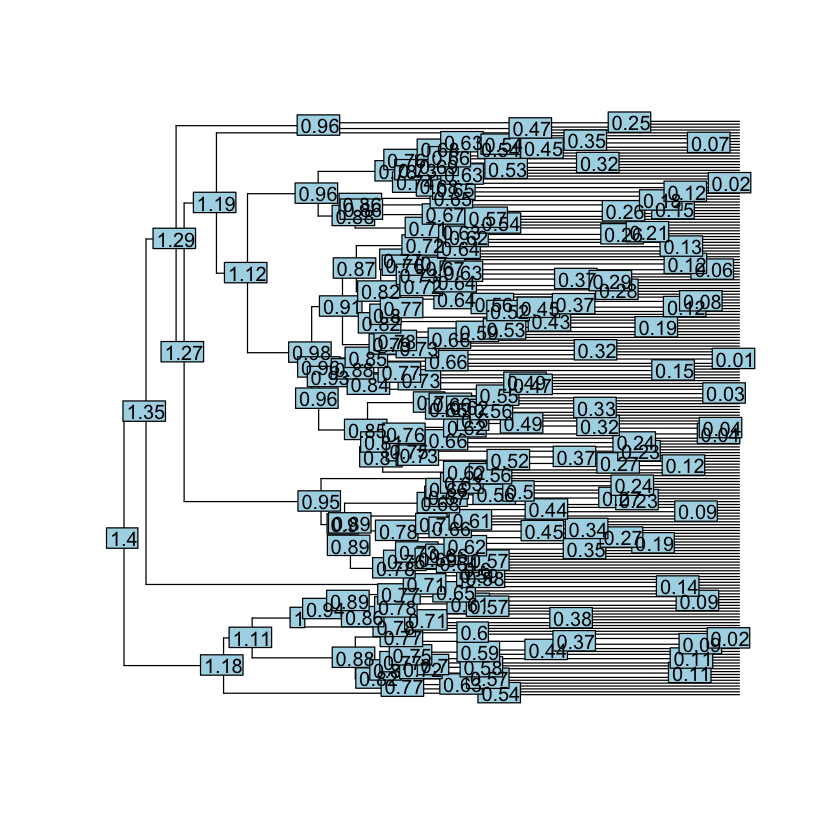

In [100]:
plot(tree[[1]], show.tip.label = F)
nodelabels(round(intnode.times(tree[[1]]), 2))

In [101]:
## Extract speciation times from tree
x <- sort(intnode.times(tree[[1]]), decreasing = T)

In [113]:
# When estimateing the rate shift times, t, based on branching times, x, we allow the shift times to be:
# 0.6, 0.8, 1, 1.2, ... 2.4
start <- 0.4
end <- 2
grid <- 0.2
print(seq(from = start, to = end, by = grid))
res <- bd.shifts.optim(x, c(rho, 1), grid, start, end)[[2]]

[1] 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0
[1] "startest"
[1] "test"
[1] 1.0 0.4
[1] 20.56374479  1.65938715  0.02211928 -1.39816853  7.78069085  0.40000000
[1] 1.0 0.6
[1] 1.992086e+01 4.436488e-08 4.562839e-01 1.457358e+00 6.444515e+00
[6] 6.000000e-01
[1] 1.0 0.8
[1] 6.052564e+01 5.373715e-09 7.541108e-01 2.190396e+00 4.063999e+00
[6] 8.000000e-01
[1] 1 1
[1] 7.490393e+01 9.424491e-09 6.536899e-01 2.372865e+00 2.430625e+00
[6] 1.000000e+00
[1] 1.0 1.2
[1] 7.492080e+01 3.043598e-09 7.900284e-01 2.414490e+00 1.926158e+00
[6] 1.200000e+00
[1] 1.0 1.4
[1] 7.517993e+01 1.712702e-05 5.607283e-05 2.424015e+00 2.442060e-04
[6] 1.400000e+00
[1] 1.0 1.6
[1] 7.520157e+01 9.513861e-09 1.237322e-01 2.424188e+00 2.605285e+00
[6] 1.600000e+00
[1] 1.0 1.8
[1] 7.520157e+01 9.513861e-09 1.237322e-01 2.424188e+00 2.605285e+00
[6] 1.800000e+00
[1] 1 2
[1] 7.520157e+01 9.513861e-09 1.237322e-01 2.424188e+00 2.605285e+00
[6] 2.000000e+00
[[1]]
[1] 7.520161e+01 1.195655e-06 2.424175e+00

[[2]]
[1] 1.992086e+

In [120]:
res
test<-pchisq(2*(res[[2]][1]-res[[3]][1]),3)
test

[[1]]
[1] 7.520161e+01 1.195655e-06 2.424175e+00

[[2]]
[1] 1.992086e+01 4.436488e-08 4.562839e-01 1.457358e+00 6.444515e+00
[6] 6.000000e-01

[[3]]
[1] 1.706433e+01 1.543463e-08 2.414703e-01 4.723798e-08 1.451875e+00
[6] 7.929555e+00 4.213383e+00 6.000000e-01 1.000000e+00

[[4]]
 [1] 1.410758e+01 9.999390e-01 1.306701e-01 1.393175e-01 6.708277e-04
 [6] 1.001288e-04 4.423923e+00 8.335409e+00 4.073310e+00 4.000000e-01
[11] 6.000000e-01 1.000000e+00

[1] 0.873564

In [107]:
print(res)
print('Turnovers')
print(res[[2]][2:3])
print('Net diversification')
print(res[[2]][4:5])

# simulation vaules:
# Turnover (extinction/speciation):
mu/lambda

# net diversification
# speciation - extinction
lambda - mu

[[1]]
[1] 1.830285e+02 3.015055e-08 1.419253e+00

[[2]]
[1] 1.333239e+02 1.650892e-02 1.624472e-08 8.151640e-01 3.264456e+00
[6] 1.000000e+00

[[3]]
[1]  1.301305e+02  9.999075e-01  1.112278e+00  2.332645e-01  1.000729e-04
[6] -1.837361e-01  4.204455e+00  6.000000e-01  1.000000e+00

[1] "Turnovers"
[1] 1.650892e-02 1.624472e-08
[1] "Net diversification"
[1] 0.815164 3.264456


[1] 1.00 0.15 0.30

[1] 0.0 8.5 3.5

In [108]:
# Fit single 0 rate shift model (i.e underparameterised)
# Calculate lambda and mu:
turnover_est <- res[[1]][2]
net_div_est <- res[[1]][3]

lambda_est <- net_div_est / (1 - turnover_est)
mu_est <- lambda_est * turnover_est

lambda_est
mu_est

[1] 1.419253

[1] 4.279126e-08

In [109]:
# Simulate 200 trees under a constant rate shift model:
constant_sim_trees <- sim.bd.taxa(n = 200, numbsim = 100, lambda = lambda_est, mu = mu_est, frac = rho[1], 
                                  complete = F)

start <- 10
end <- 100
grid <- 5

In [110]:
# Fit a single rate to trees:
constant_likelihoods <- vector()
for(i in 1:length(constant_sim_trees)){
    tr_times <- sort(intnode.times(constant_sim_trees[[i]]), decreasing = T)
    lik_temp <- bd.shifts.optim(tr_times, sampling = rho, start = start, end = end, grid = grid)[[2]]
    constant_likelihoods[i] <- lik_temp[[1]][1]
}

[1] "startest"
[1] "test"
[1]  1 10
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 1.000000e+01
[1]  1 15
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 1.500000e+01
[1]  1 20
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 2.000000e+01
[1]  1 25
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 2.500000e+01
[1]  1 30
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 3.000000e+01
[1]  1 35
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 3.500000e+01
[1]  1 40
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 4.000000e+01
[1]  1 45
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 4.500000e+01
[1]  1 50
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 5.000000e+01
[1]  1 55
[1] 1.774657e+02 2.152552e-08 4.993786e-02 1.498100e+00 1.548036e+00
[6] 5.500000e+01
[1]  1 60
[1] 

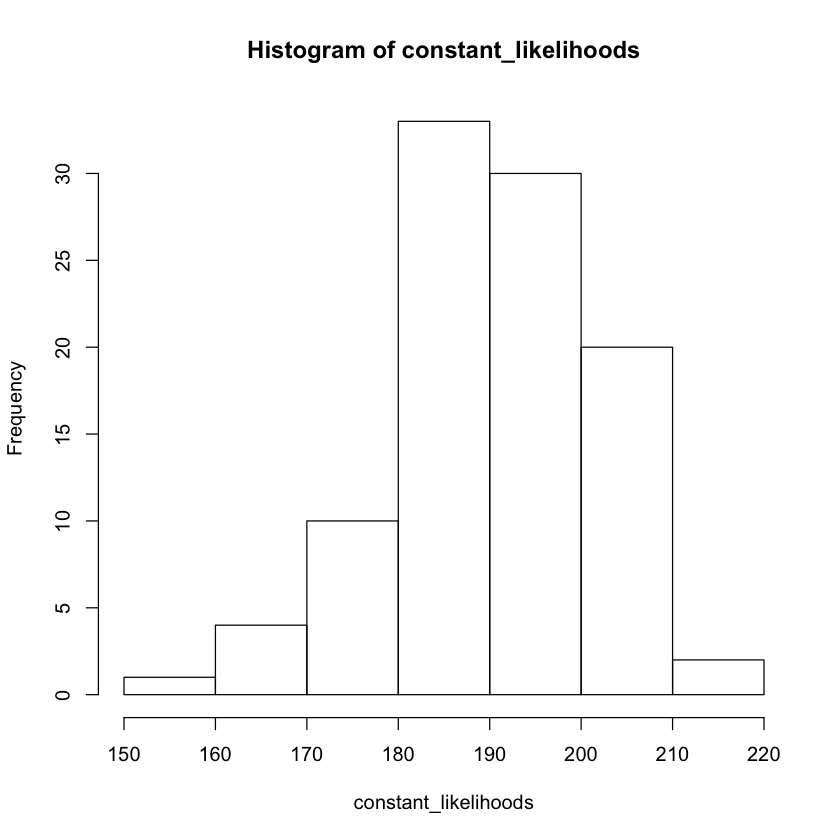

In [111]:
hist(constant_likelihoods)

In [114]:
res

[[1]]
[1] 7.520161e+01 1.195655e-06 2.424175e+00

[[2]]
[1] 1.992086e+01 4.436488e-08 4.562839e-01 1.457358e+00 6.444515e+00
[6] 6.000000e-01

[[3]]
[1] 1.706433e+01 1.543463e-08 2.414703e-01 4.723798e-08 1.451875e+00
[6] 7.929555e+00 4.213383e+00 6.000000e-01 1.000000e+00

[[4]]
 [1] 1.410758e+01 9.999390e-01 1.306701e-01 1.393175e-01 6.708277e-04
 [6] 1.001288e-04 4.423923e+00 8.335409e+00 4.073310e+00 4.000000e-01
[11] 6.000000e-01 1.000000e+00

In [115]:
lik_temp

[[1]]
[1] 183.2157926   0.3873787   1.1886077

[[2]]
[1] 183.2157880   0.3875393   0.4615778   1.1887137   1.2628068  10.0000000

[[3]]
[1] 183.2157880   0.3875393   0.4615778   0.4615778   1.1887137   1.2628068
[7]   1.2628068  10.0000000  15.0000000